In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("1730285881-Airbnb_Open_Data.csv", dtype={'license': str})

In [5]:
# Initial Data Exploration
print("--- Initial Data Exploration ---")
print("Shape of the dataframe:", df.shape)
print("\nFirst 5 rows of the dataframe:")
print(df.head())
print("\nInformation about the dataframe:")
df.info()
print("\nSummary statistics of the dataframe:")
print(df.describe())

--- Initial Data Exploration ---
Shape of the dataframe: (102599, 26)

First 5 rows of the dataframe:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

  

In [7]:
# Standardize column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
# Handling missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365        

In [9]:
# Drop columns with a high percentage of missing values or irrelevant for this analysis
df.drop(['license', 'country_code', 'country'], axis=1, inplace=True)

In [11]:
# Impute missing values for key columns by reassigning
df['host_identity_verified'] = df['host_identity_verified'].fillna('unconfirmed')
df['host_name'] = df['host_name'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')
df['house_rules'] = df['house_rules'].fillna('No rules specified')

In [13]:
# For numerical columns, fill with the median by reassigning
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
df['review_rate_number'] = df['review_rate_number'].fillna(df['review_rate_number'].median())

In [15]:
# Clean 'price' and 'service_fee' columns by removing '$' and ',' then converting to numeric
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['service_fee'] = df['service_fee'].str.replace('$', '').str.replace(',', '').astype(float)

In [16]:
# Drop remaining rows with missing values
df.dropna(inplace=True)

In [17]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nShape of the dataframe after cleaning:", df.shape)


Missing values after cleaning:
id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

Shape of the dataframe after cleaning: (85201, 23)


In [19]:
# Set the style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

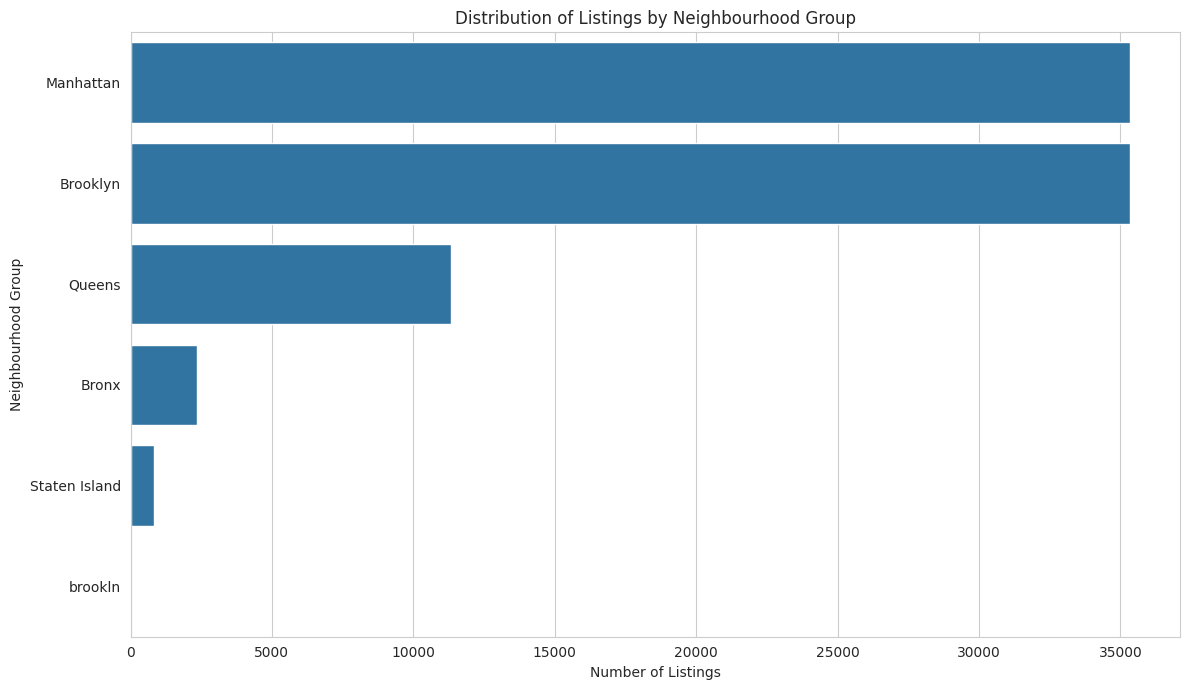

In [20]:
# Distribution of Listings by Neighbourhood Group
plt.figure()
sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()

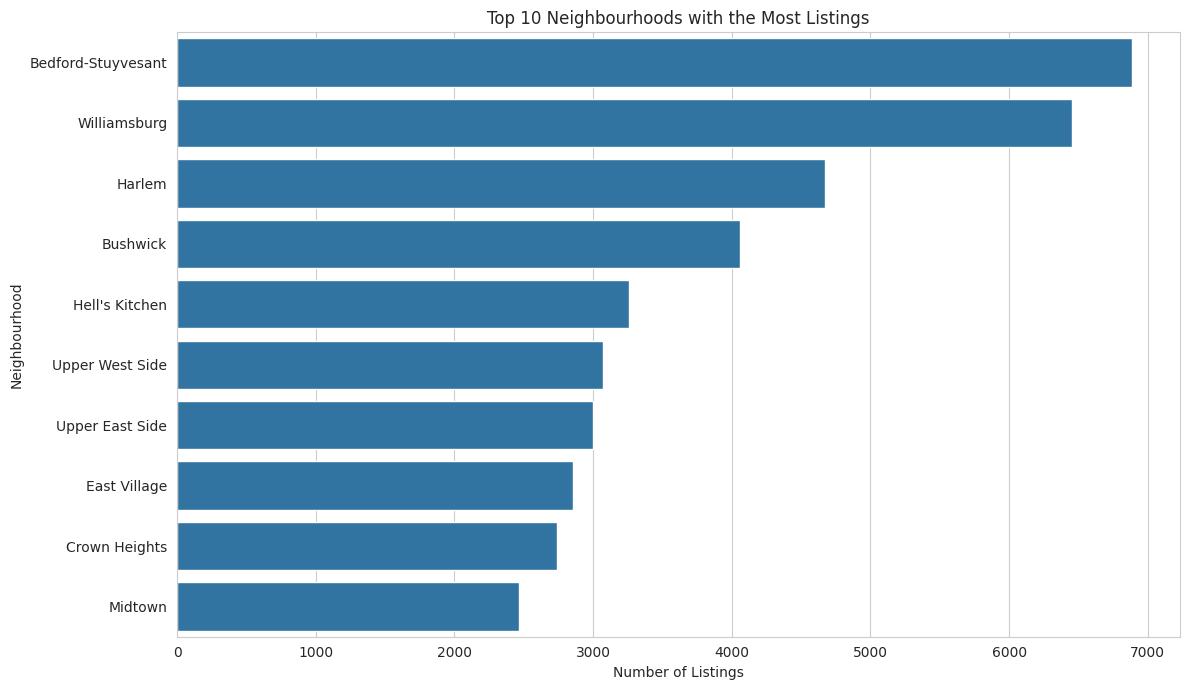

In [21]:
# Top 10 Neighbourhoods with the Most Listings
plt.figure()
sns.countplot(y='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index[:10])
plt.title('Top 10 Neighbourhoods with the Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

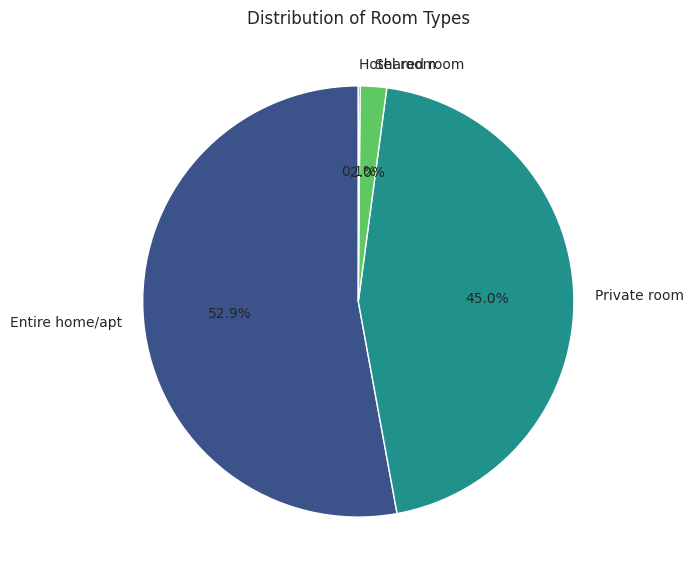

In [22]:
# Distribution of Room Types
plt.figure()
df['room_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 3))
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()

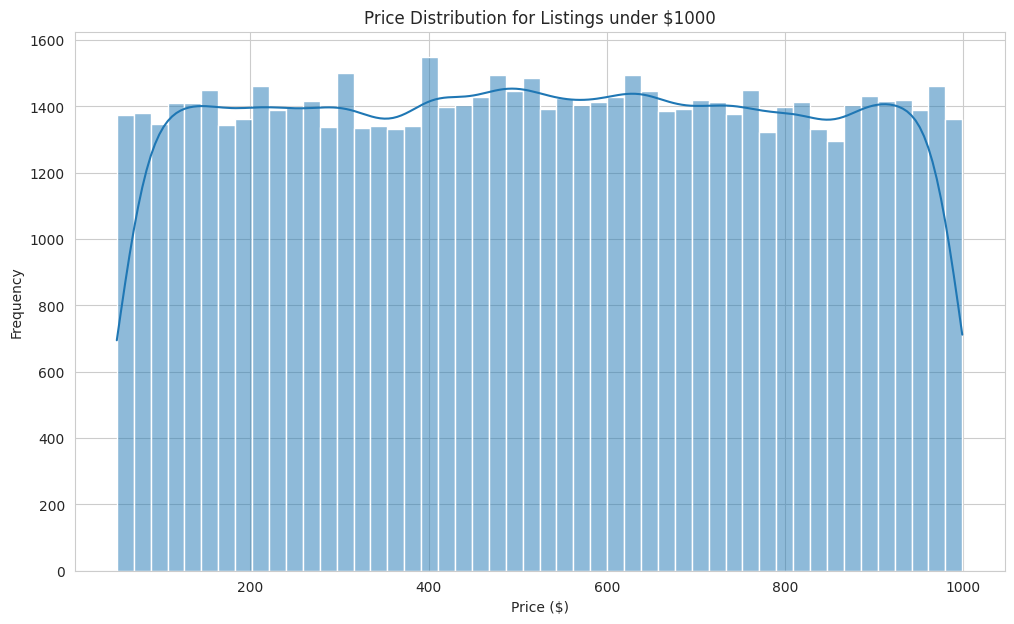

In [23]:
# Price Distribution
plt.figure()
sns.histplot(df[df['price'] < 1000]['price'], bins=50, kde=True)
plt.title('Price Distribution for Listings under $1000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

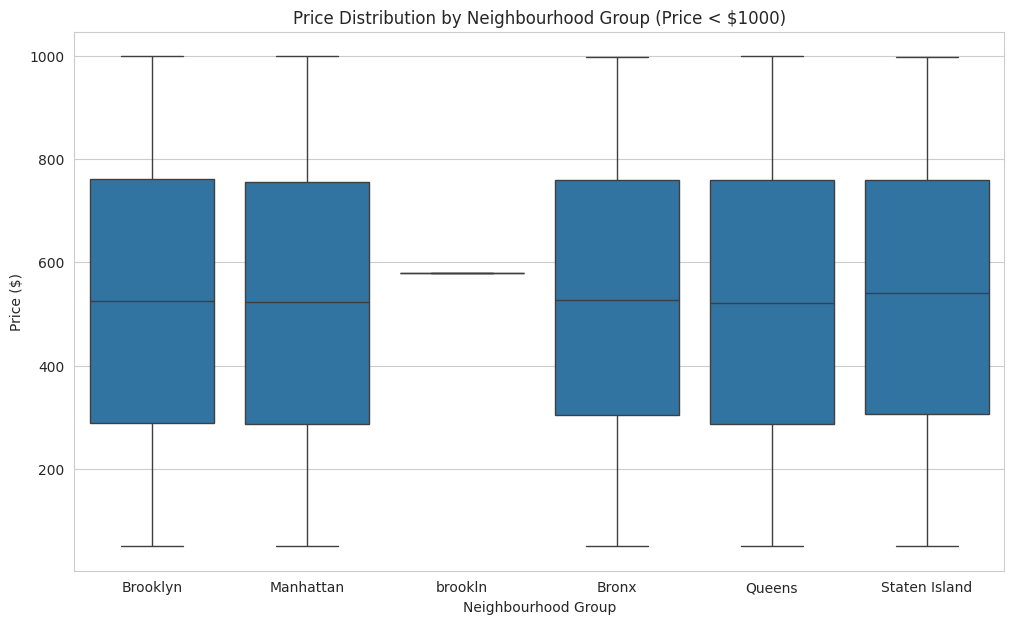

In [24]:
# Price Distribution by Neighbourhood Group
plt.figure()
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 1000])
plt.title('Price Distribution by Neighbourhood Group (Price < $1000)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.show()

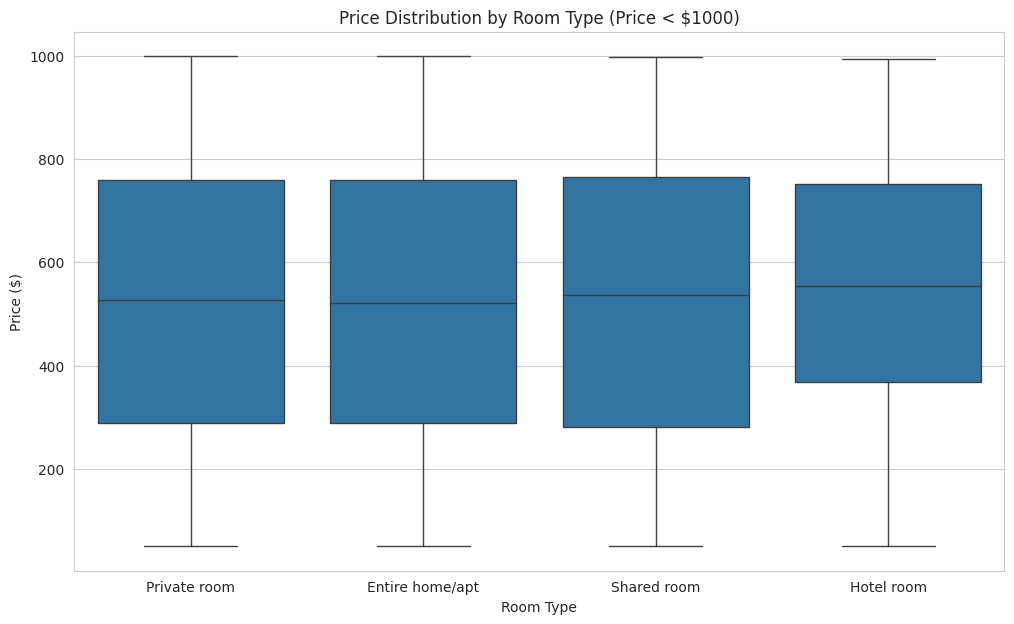

In [25]:
# Price Distribution by Room Type
plt.figure()
sns.boxplot(x='room_type', y='price', data=df[df['price'] < 1000])
plt.title('Price Distribution by Room Type (Price < $1000)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

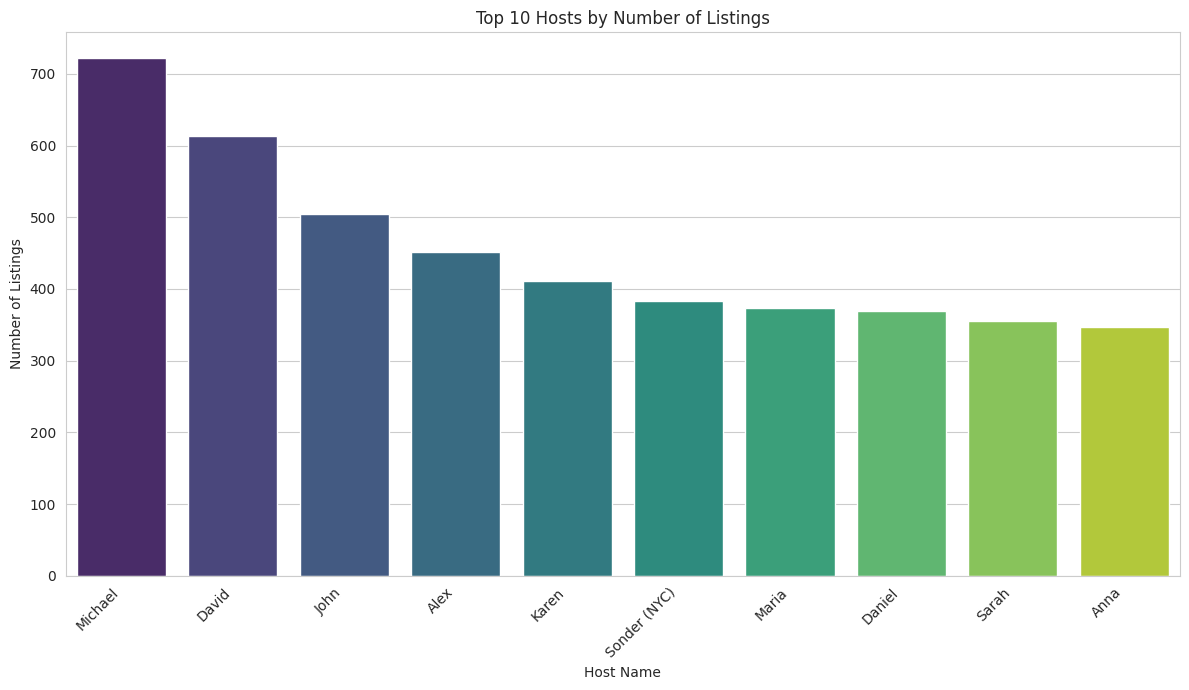

In [27]:
# Number of Listings per Host
host_listings = df['host_name'].value_counts().head(10)
plt.figure()

# Assign the x-axis variable to 'hue' and set legend to False
sns.barplot(x=host_listings.index,
            y=host_listings.values,
            hue=host_listings.index,
            palette='viridis',
            legend=False)

plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

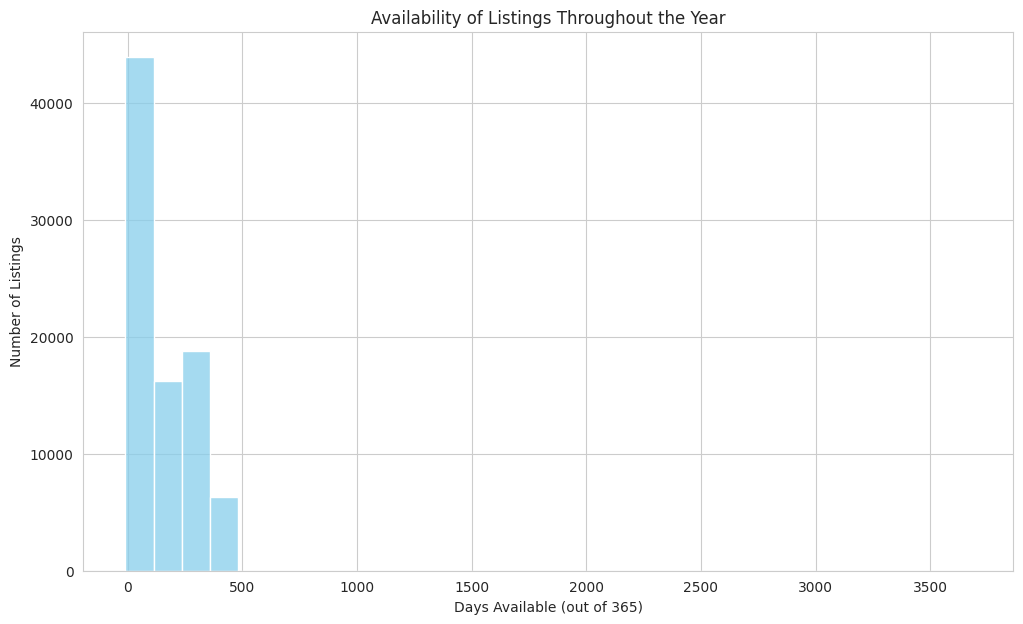

In [28]:
# Availability of Listings
plt.figure()
sns.histplot(df['availability_365'], bins=30, kde=False, color='skyblue')
plt.title('Availability of Listings Throughout the Year')
plt.xlabel('Days Available (out of 365)')
plt.ylabel('Number of Listings')
plt.show()

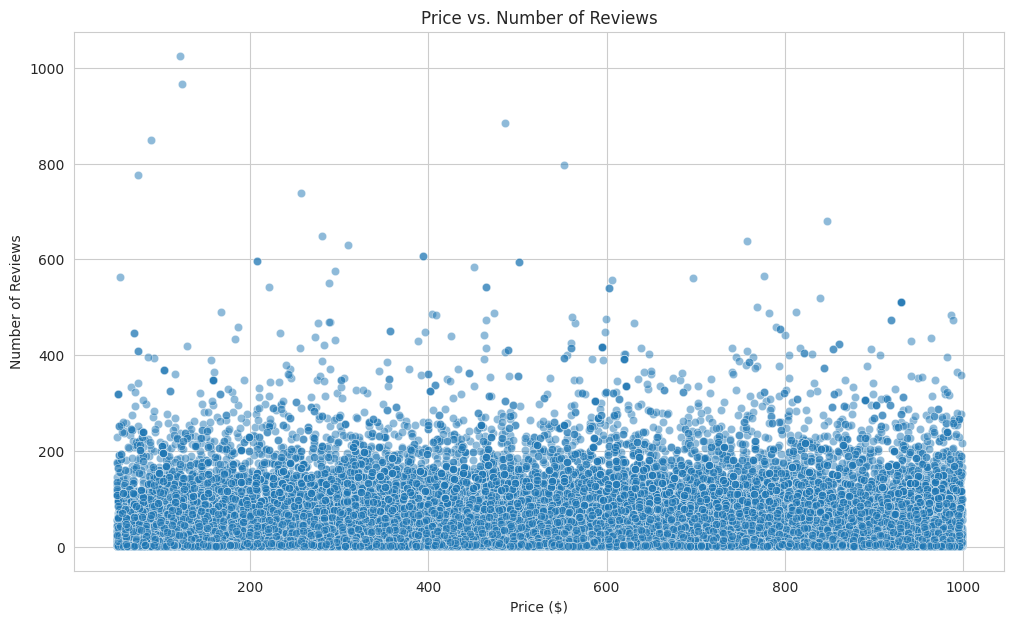

In [29]:
# Relationship between Price and Number of Reviews
plt.figure()
sns.scatterplot(x='price', y='number_of_reviews', data=df[df['price'] < 1000], alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.show()

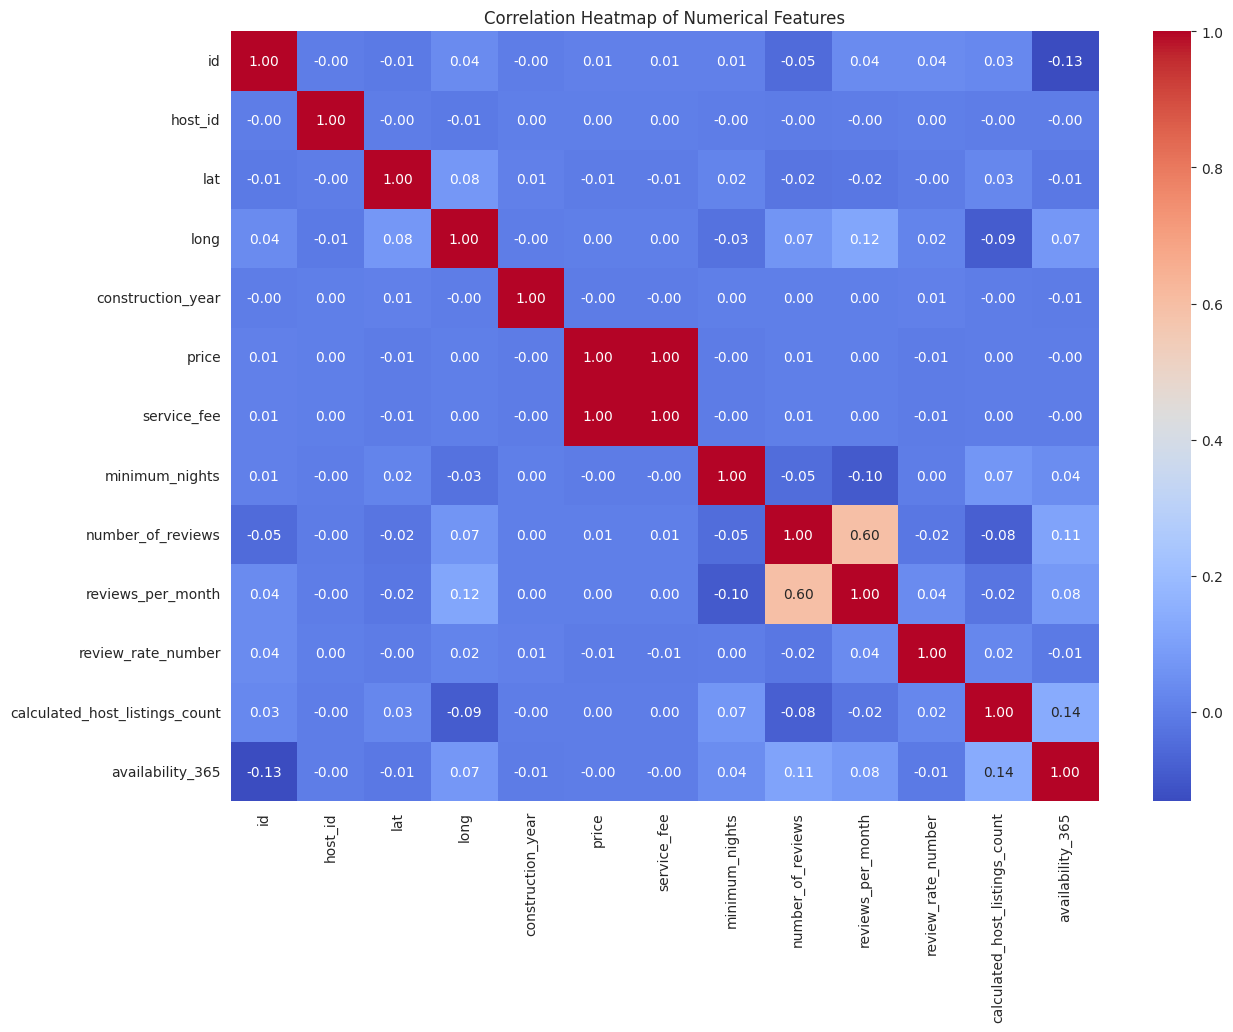

In [30]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(14, 10))
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()